<a href="https://colab.research.google.com/github/shivanarasimha2002/DIP_CSIO/blob/main/Assignment_01_DIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Assignment 01**

Name: Kondeti Shiva Narasimha

ID No: 32EE25J15001

IDDP Student (Jan 2025 Session)

Q1) Plot the histogram of an image and identify the thresholding Global and/or Local

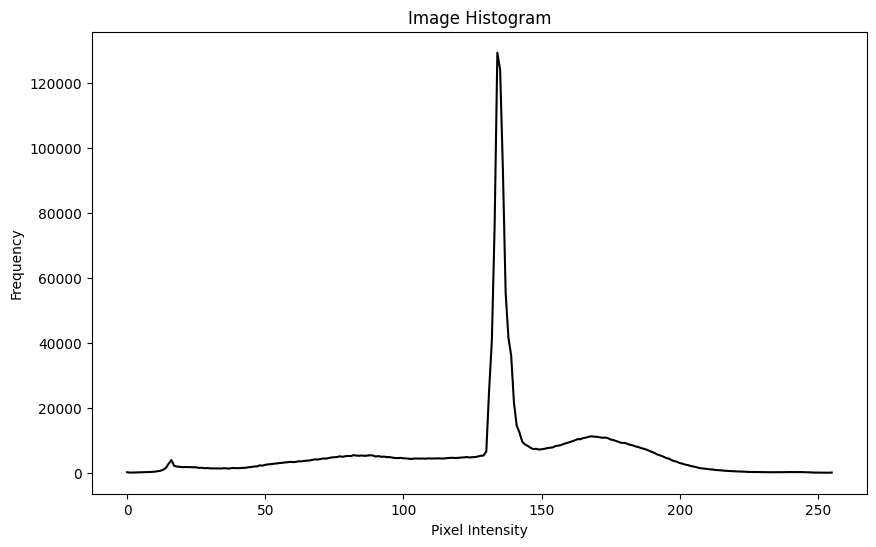

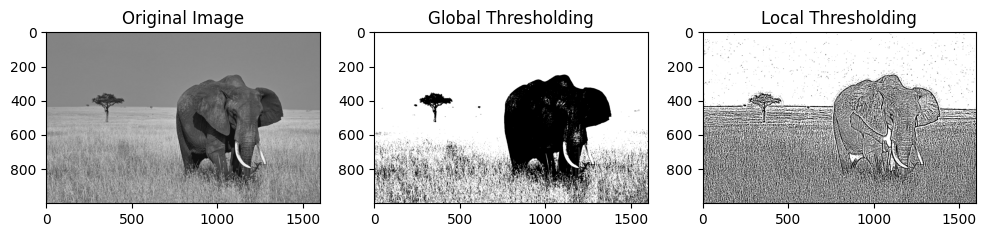

'\nHence, Computing and Plotting Histogram: We compute and visualize the pixel intensity distribution to understand the image’s brightness and contrast.\nThresholding: Global Thresholding applies a fixed threshold across the entire image.\n              Local Thresholding applies a varying threshold for each pixel, adapting to the image’s local regions.\n'

In [ ]:
# Histogram: To visualize the distribution of pixel values

import cv2 # (opencv library)
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/R.jfif', cv2.IMREAD_GRAYSCALE) # image path, convert to gary colour

histogram, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])
'''
1) .flatten: converts 2D image into a 1D array
            Ex: 2D image (300 X 300 pixel values) to 1D array (90000 elements)
   this is used as histogram computation requires all pixel values to be considered as a single list of intensity values.
2) np.histogram(): Which computes the histogram of the pixel intensisties in the flattened image
   # here 'bins = 256' This defines the number of bins into which pixel intensities will be divided
                      grayscale images ranges (o to 2555), we use 256 bins, as Each bin represents a specific range of pixel intensities
                      (e.g., bin 0 represents pixels with intensity 0, bin 1 represents pixels with intensity 1, and so on).
'''
plt.figure(figsize=(10, 6)) # initializes a figure with a specific size (10 inches by 6 inches).
plt.plot(bins[:-1], histogram, color='black') #plots the histogram using the bin edges (excluding the last bin edge) on the x-axis and the frequency counts on the y-axis.
plt.title('Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

_, global_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
#127: This is the global threshold value.
#Pixel intensities above 127 will be set to 255 (white), and below 127 will be set to 0 (black).


local_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Show the results
plt.figure(figsize=(12, 6)) #
plt.subplot(1, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(global_thresh, cmap='gray'), plt.title('Global Thresholding')
plt.subplot(1, 3, 3), plt.imshow(local_thresh, cmap='gray'), plt.title('Local Thresholding')
plt.show()

'''
Hence, Computing and Plotting Histogram: We compute and visualize the pixel intensity distribution to understand the image’s brightness and contrast.
Thresholding: Global Thresholding applies a fixed threshold across the entire image.
              Local Thresholding applies a varying threshold for each pixel, adapting to the image’s local regions.
'''

[Click here to download the image which is used in the above program](https://https://www.bing.com/images/search?view=detailV2&ccid=zh5Cbx1K&id=32B4993D7F4D95DC5DB4E15FCFC3650064A4E081&thid=OIP.zh5Cbx1KxwIXi5Xt-SYQZwHaEo&mediaurl=https%3A%2F%2Fth.bing.com%2Fth%2Fid%2FR.ce1e426f1d4ac702178b95edf9261067%3Frik%3DgeCkZABlw89f4Q%26riu%3Dhttp%253a%252f%252ffeedinspiration.com%252fwp-content%252fuploads%252f2015%252f04%252fWild-Animal-Elephant-HD-Wallpapers-Desktop.jpg%26ehk%3DZPAq8RsFgHCdric4cFQzlcFphtTEofktlCnfiV8SaY8%253d%26risl%3D%26pid%3DImgRaw%26r%3D0&exph=1000&expw=1600&q=animals&simid=608046179050791697&FORM=IRPRST&ck=796C9B0B3AC47F6D54EAEDC8A9AA560E&selectedIndex=6&itb=0&cw=1150&ch=851&ajaxhist=0&ajaxserp=0)

Q2) Segment the Region of intrest based on discontinuity (Edge) and similarity (thresholding, region growth and K-Means). Conclude the comparison

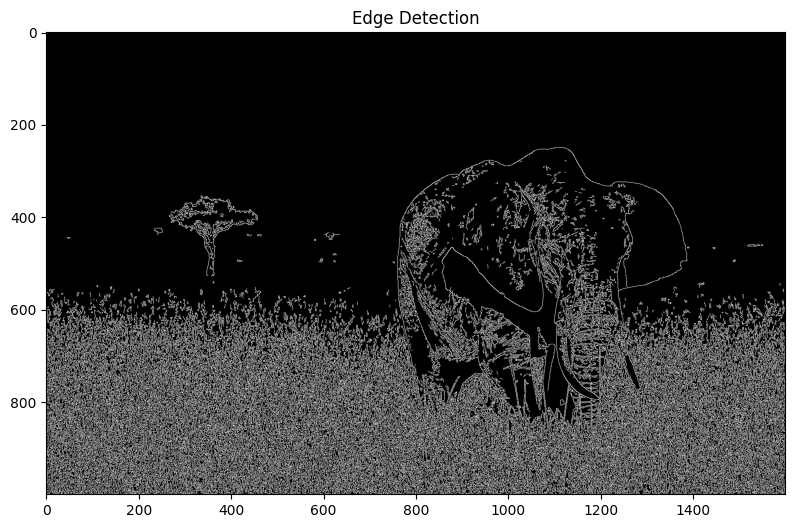

In [ ]:
#1. Edge Detection (Canny Edge Detector : Highlights edges and boundaries of objects in an image)
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/R.jfif', cv2.IMREAD_GRAYSCALE)

#edge detector
#Pixels with gradients less than this value '100' are discarded as not being part of an edge.
# and Pixels with gradients higher than this value are immediately considered as edges.
edges = cv2.Canny(image, threshold1=100, threshold2=200)

plt.figure(figsize=(10, 6))
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.show()

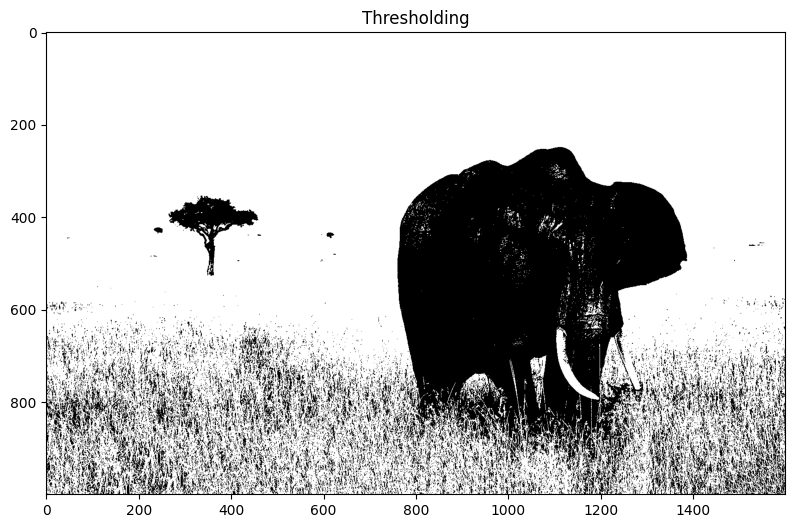

In [ ]:
#2. Thresholding
import cv2
import numpy as np
import matplotlib.pyplot as plt

_, thresholded_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10, 6))
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholding')
plt.show()

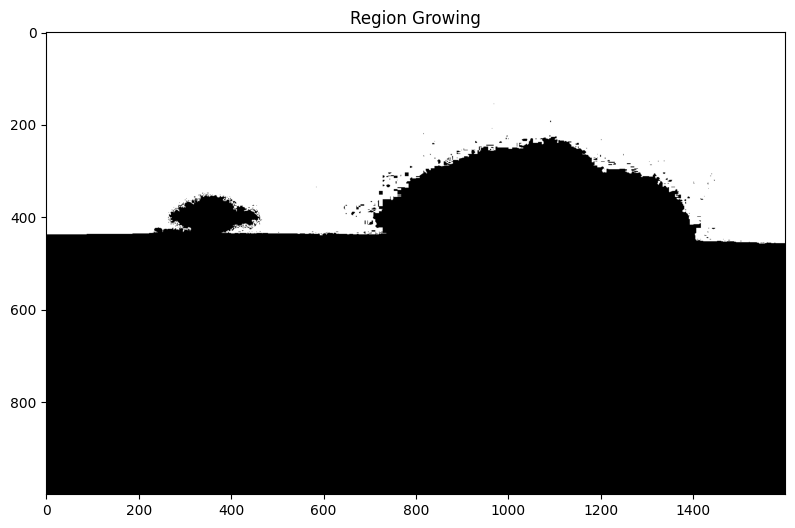

In [ ]:
#3. Region Growing (That grows regions based on pixel similarity (intensity))
import numpy as np
import matplotlib.pyplot as plt

def region_growing(image, seed, threshold=10):
    rows, cols = image.shape
    segmented = np.zeros_like(image)
    region = [seed]

    segmented[seed] = 255
    while region:
        x, y = region.pop()

        #The 4-connected neighbors (up, down, left, right)
        for nx, ny in [(x-1, y), (x+1, y), (x, y-1), (x, y+1)]:
            if 0 <= nx < rows and 0 <= ny < cols and segmented[nx, ny] == 0:
                if abs(int(image[nx, ny]) - int(image[seed])) < threshold:
                    region.append((nx, ny))
                    segmented[nx, ny] = 255

    return segmented

seed_point = (100, 100)  # Choose a seed point
segmented_image = region_growing(image, seed_point)

plt.figure(figsize=(10, 6))
plt.imshow(segmented_image, cmap='gray')
plt.title('Region Growing')
plt.show()

'''
Role of Seed:
The seed is chosen manually or automatically as a pixel within the region that you want to segment.
The algorithm starts from this pixel and grows outward by adding neighboring pixels that are similar to the seed pixel (usually based on some similarity measure like intensity, color, or texture).
The region grows by including neighboring pixels whose intensity (or other features) is similar to the seed pixel, as determined by the threshold.
'''

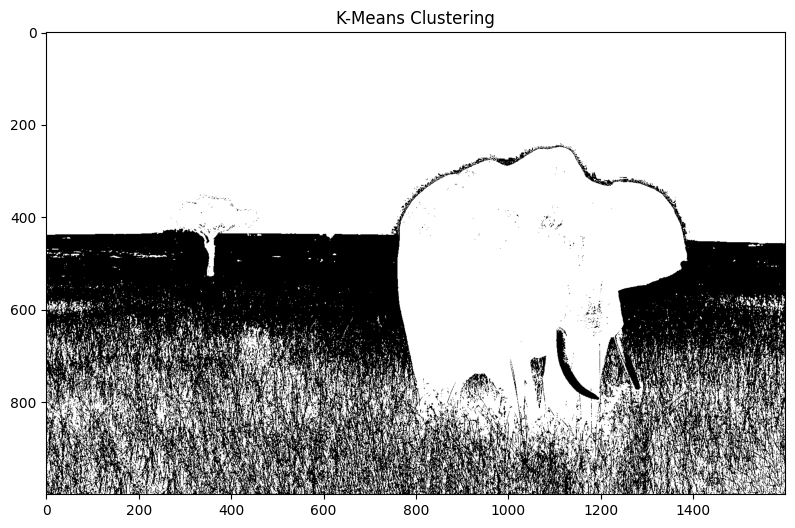

In [ ]:
#4. K Mean Clustering
from sklearn.cluster import KMeans

image_reshaped = image.reshape((-1, 1))

kmeans = KMeans(n_clusters=2, random_state=0).fit(image_reshaped) # here k = 2
segmented_kmeans = kmeans.labels_.reshape(image.shape)

plt.figure(figsize=(10, 6))
plt.imshow(segmented_kmeans, cmap='gray')
plt.title('K-Means Clustering')
plt.show()

Conclusion:

*   Canny Edge Detection highlights edges and boundaries of objects in an image.
*   Thresholding segments the image based on a fixed intensity threshold.

*   Region Growing segments regions based on pixel similarity (intensity in this case).
*   K-Means Clustering groups pixels based on their intensity (or color, if extended) into a set number of clusters






.